### Group-1 Predicting RTC Severity 

**Days of week** column is encoded as     
Wednesday 1 --   Thurday   2  --    Friday    3  --   Saturday  4  --   Sunday    5 ----  Monday    6 ---    Tuesday   7

**InScotland** column is encoded as 

1  for Yes  if accident took place   

2   for No  if accident did not took place in Scotland

**Urban_or_Rural_Area** Accidents took place in Urban or rural area. Here Urban is indicated by  1 and Rural area is 
indicated by 2.

**Road_Type** There are diffrent types of roads in Liverpool  where accidents took place 

Dual carriageway  --->    represented  by  1     -----        Single carriageway  -->  represented  by  2

One way street  -->      represented  by  3     -----        Roundabout   --->         represented  by  4

Slip road    -->         represented  by  5

**Weather_Conditions** --

Fine no high winds    = 1 -- 
Raining no high winds = 2 --
Other = 3 --
Snowing no high winds = 4 --
Fine + high winds = 5 --
Raining + high winds = 6 --
Fog or mist =7 --
Snowing + high winds = 9 --

**Road_Surface_Conditions**
 Dry  =1 --  Wet or damp = 2 ---  Frost or ice = 3  ----  Snow = 4 --- Flood over 3cm. deep = 5 
    
**1st_Road_Class**  
 B = 1
 C = 2
 A = 4
Motorway = 5
A(M) = 6

**Light_Conditions** There are 5 light conditions

Darkness - lights lit     is  represented by 1   ,    
Darkness - lighting unknown   represented b 2    ,
Darkness - lights unlit    represented by 3      , 
Darkness - no lighting     represented by 4      ,
Daylight       represented by              5  


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno


sns.set()
%matplotlib inline

In [2]:
#!pip install pyarrow
#!pip install fastparquet

In [2]:

data=pd.read_parquet( 'accident_data_lgbm_impute.parquet' , engine='auto')
df=data.copy()

In [3]:
df.head()

,Accident_Index,Accident_Severity,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,...,Year,InScotland,1st_Road_Class_missing,2nd_Road_Class_missing,2nd_Road_Number_missing,Carriageway_Hazards_missing,Junction_Control_missing,LSOA_of_Accident_Location_missing,Special_Conditions_at_Site_missing,Weather_Conditions_missing
0,200501BS00002,Slight,1.0,450.0,1.0,0.0,3.0,1,1.0,1.0,...,2005,1,0,0,0,1,0,0,1,0
1,200501BS00003,Slight,2.0,0.0,1.0,0.0,3.0,2,1.0,4.0,...,2005,1,0,1,0,1,1,0,1,0
2,200501BS00005,Slight,2.0,0.0,1.0,0.0,3.0,3,1.0,4.0,...,2005,1,1,1,0,1,1,0,1,0
3,200501BS00007,Slight,2.0,0.0,1.0,0.0,3.0,2,1.0,3.0,...,2005,1,0,1,0,1,0,0,1,0
4,200501BS00010,Slight,4.0,3212.0,3.0,304.0,3.0,4,1.0,1.0,...,2005,1,0,0,0,1,0,0,1,0


In [4]:
df.columns

Index(['Accident_Index', 'Accident_Severity', '1st_Road_Class',
       '1st_Road_Number', '2nd_Road_Class', '2nd_Road_Number',
       'Carriageway_Hazards', 'Day_of_Week',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Junction_Control',
       'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland', '1st_Road_Class_missing',
       '2nd_Road_Class_missing', '2nd_Road_Number_missing',
       'Carriageway_Hazards_missing', 'Junction_Control_missing',
       'LSOA_of_Accident_Location_

In [5]:
df.shape

(1037508, 41)

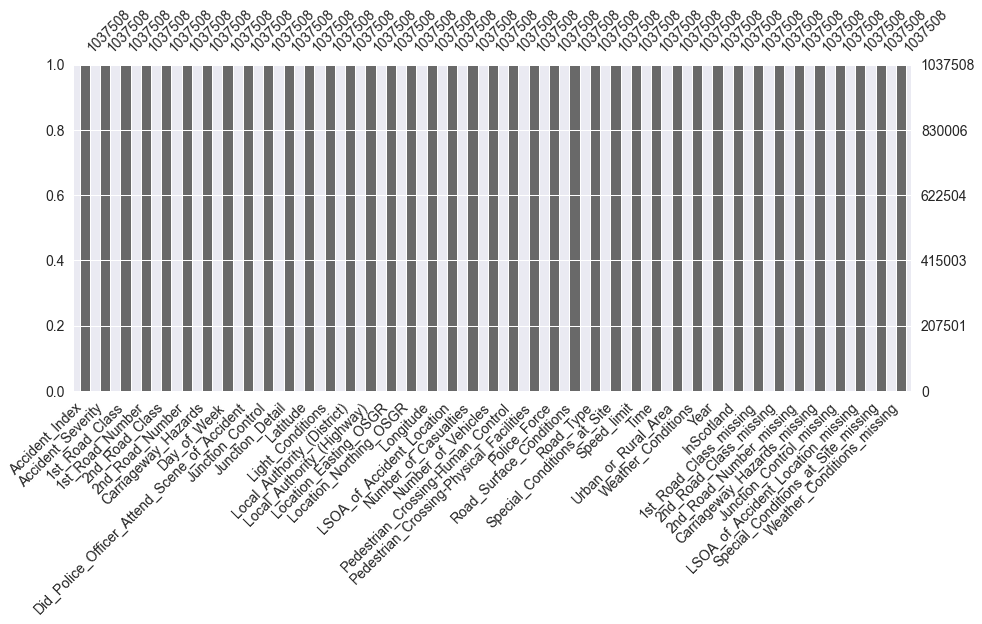

In [7]:
msno.bar(df,figsize=(15,6) , fontsize=14);

**Observations** Since Data is clean there are no missing values in the data

### Accident_Severity

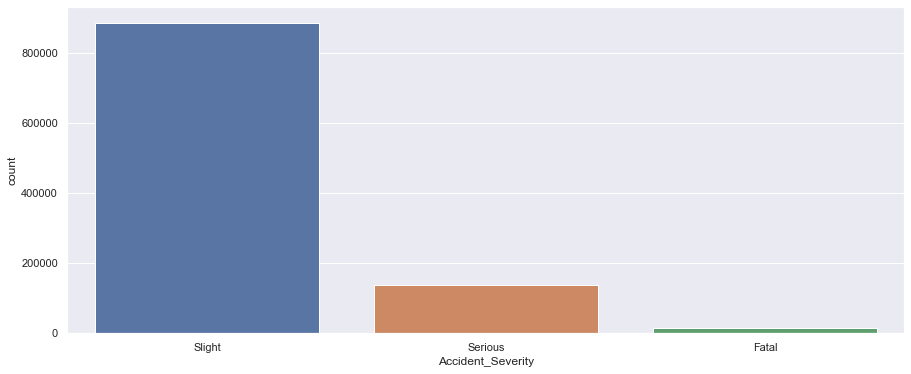

In [107]:
plt.figure(figsize=(15,6))
sns.countplot(x='Accident_Severity' , data=df);

In [7]:
df_fatal=df[df['Accident_Severity']=='Fatal']
df_Serious=df[df['Accident_Severity']=='Serious']
df_Slight=df[df['Accident_Severity']=='Slight']

In [8]:
df_fatal.head()

,Accident_Index,Accident_Severity,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,...,Year,InScotland,1st_Road_Class_missing,2nd_Road_Class_missing,2nd_Road_Number_missing,Carriageway_Hazards_missing,Junction_Control_missing,LSOA_of_Accident_Location_missing,Special_Conditions_at_Site_missing,Weather_Conditions_missing
14156,200501RY10515,Fatal,2.0,0.0,4.0,207.0,3.0,1,1.0,1.0,...,2005,1,0,0,0,1,0,0,1,0
15315,200501TA00003,Fatal,1.0,413.0,4.0,5.0,3.0,2,1.0,1.0,...,2005,1,0,0,0,1,0,0,1,0
15317,200501TA00006,Fatal,2.0,0.0,1.0,0.0,3.0,1,1.0,3.0,...,2005,1,1,1,0,1,0,0,1,0
15322,200501TA00015,Fatal,1.0,401.0,1.0,0.0,4.0,4,1.0,3.0,...,2005,1,0,1,0,1,0,0,1,0
15347,200501TA00065,Fatal,4.0,4.0,1.0,0.0,3.0,2,1.0,1.0,...,2005,1,0,1,0,1,0,0,1,0


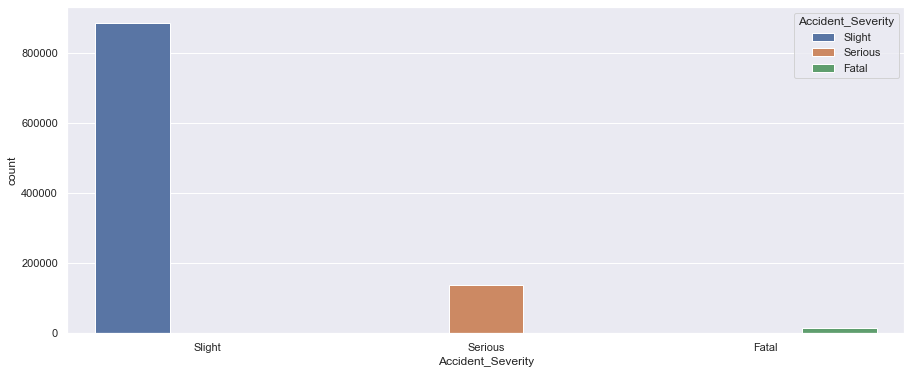

In [106]:
plt.figure(figsize=(15,6))
sns.countplot(x='Accident_Severity' , hue='Accident_Severity' , data=df);

In [111]:
df['Accident_Severity'].value_counts()

Slight     886083
Serious    136994
Fatal       14431
Name: Accident_Severity, dtype: int64

In [127]:
df['Accident_Severity'].value_counts()/len(df)*100



Slight     85.404932
Serious    13.204139
Fatal       1.390929
Name: Accident_Severity, dtype: float64

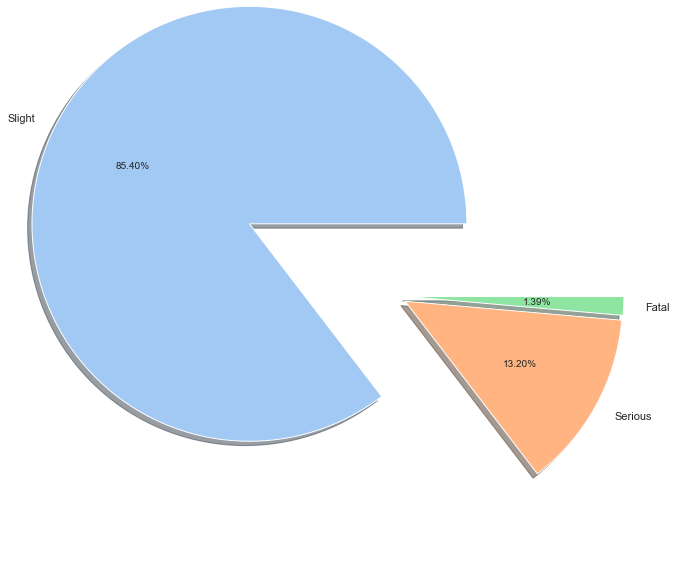

In [192]:
plt.figure(figsize=(20,10))
labels=['Slight' , 'Serious' , 'Fatal']
colors=sns.color_palette('pastel')
plt.pie(df['Accident_Severity'].value_counts() ,labels=labels , autopct='%.2f%%' , shadow= True , colors=colors ,
         explode=[0.75,  0.05 , 0.05]);

### Days of Week 

In [10]:
df['Day_of_Week'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [11]:
df['Day_of_Week'].value_counts()

7    170110
1    156280
6    154393
2    154066
3    146930
4    140785
5    114944
Name: Day_of_Week, dtype: int64

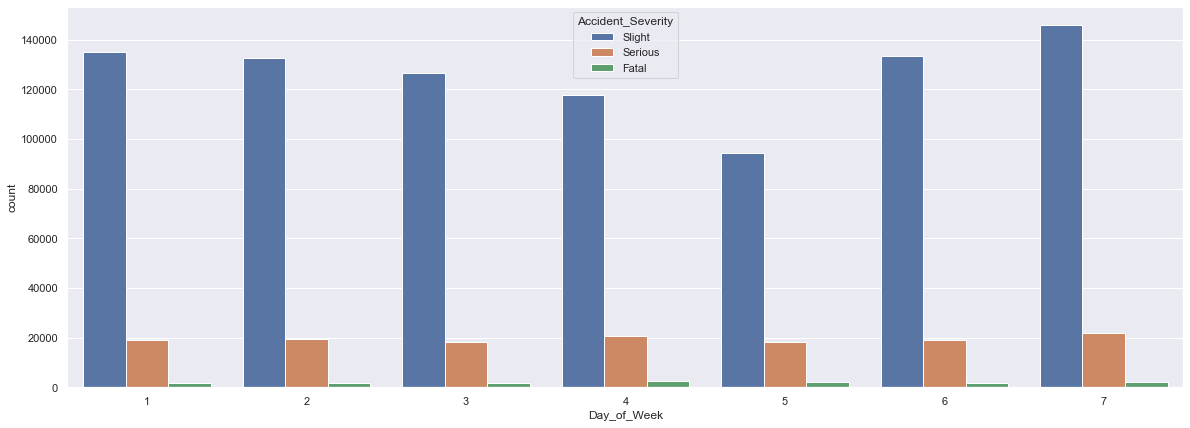

In [90]:
plt.figure(figsize=(20,7))

sns.countplot(x='Day_of_Week'  ,  hue= 'Accident_Severity', data=df);

**Obseravtions**
From the graph it is seen that most of the accidents took place at day # 7  that is Tuesday and also mostly serious accidents took place 
on that day as compared to other days.

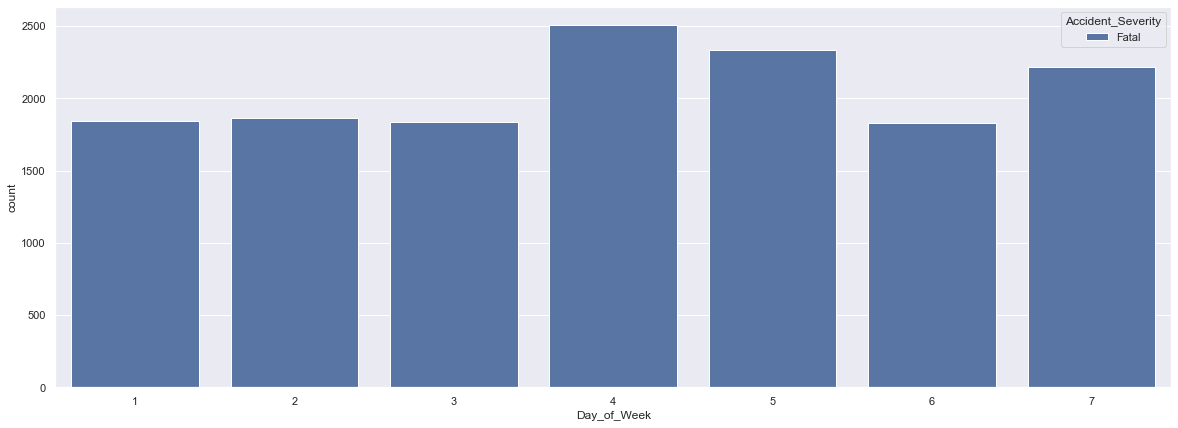

In [91]:
plt.figure(figsize=(20,7))
sns.countplot(x='Day_of_Week'  ,  hue= 'Accident_Severity', data=df_fatal);

**Observation** Most of the Fatal Accidents took place on Saturday ie, encoded as 4  and Sunday encoded as 5

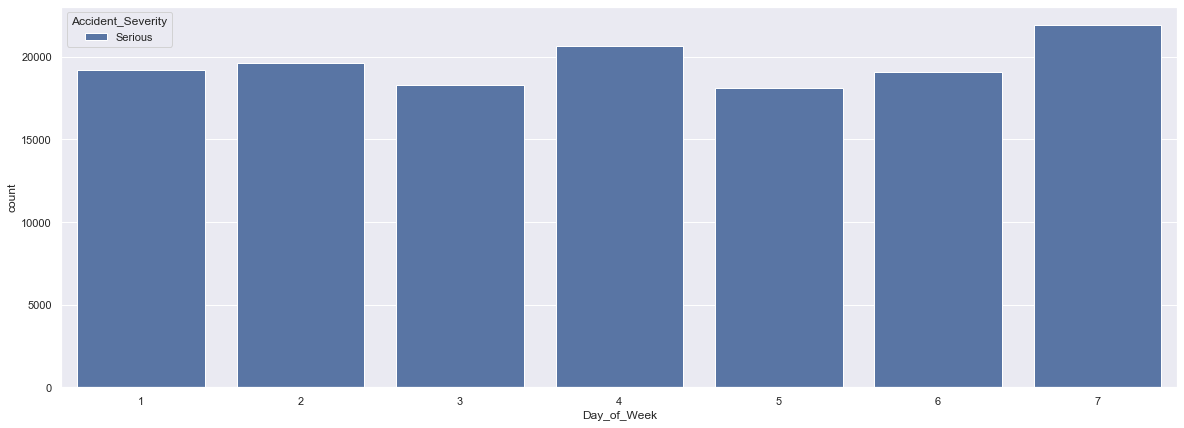

In [92]:
plt.figure(figsize=(20,7))
sns.countplot(x='Day_of_Week'  ,  hue= 'Accident_Severity', data=df_Serious);

**Observation**  Most Serious Accidents took place on Tuesday , ie, Day 7 

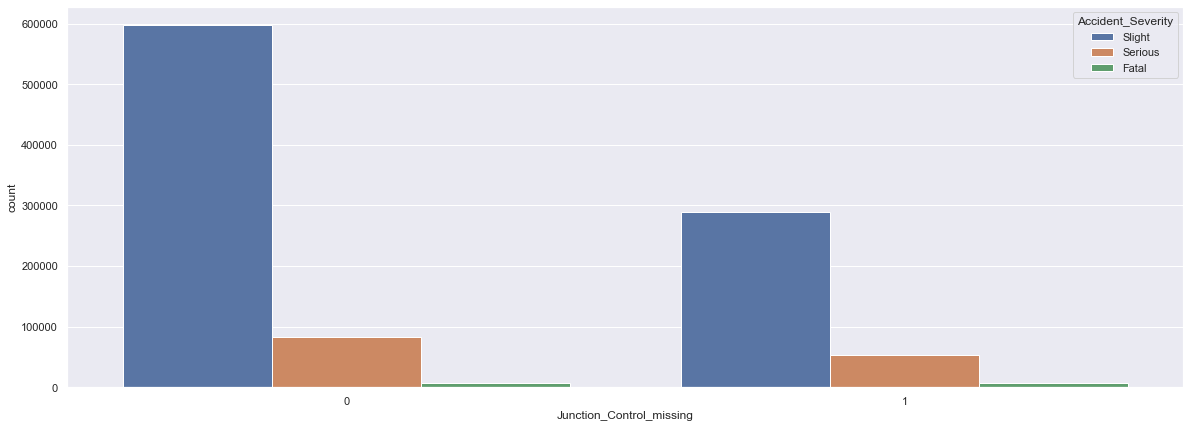

In [93]:
plt.figure(figsize=(20,7))
sns.countplot(x='Junction_Control_missing'  ,hue= 'Accident_Severity' ,  data=df);

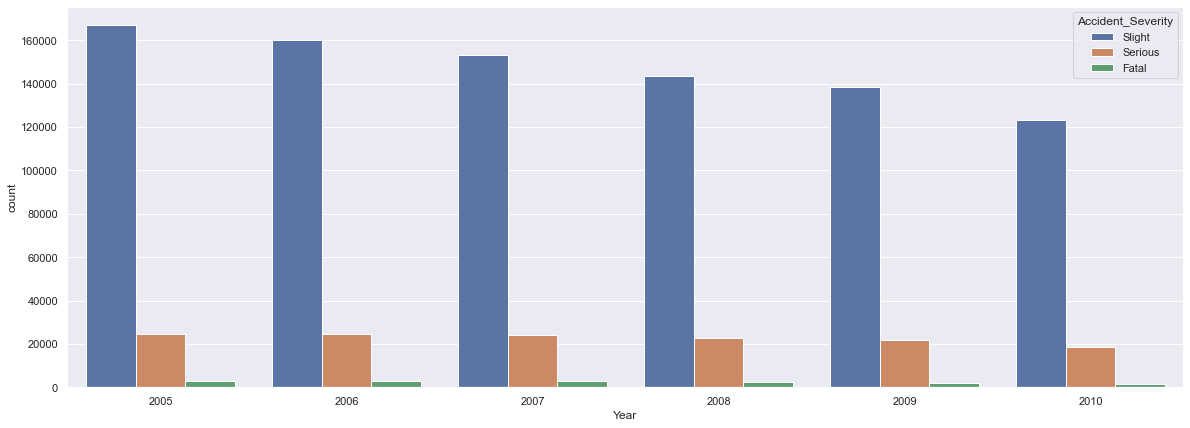

In [94]:
plt.figure(figsize=(20,7))
sns.countplot(x='Year'  ,hue= 'Accident_Severity', data=df);

In [16]:
df['InScotland'].unique()

array([1, 2], dtype=int64)

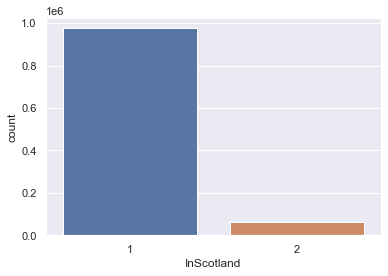

In [17]:
sns.countplot(x='InScotland'  , data=df);

###  Road Class and Accident Severity

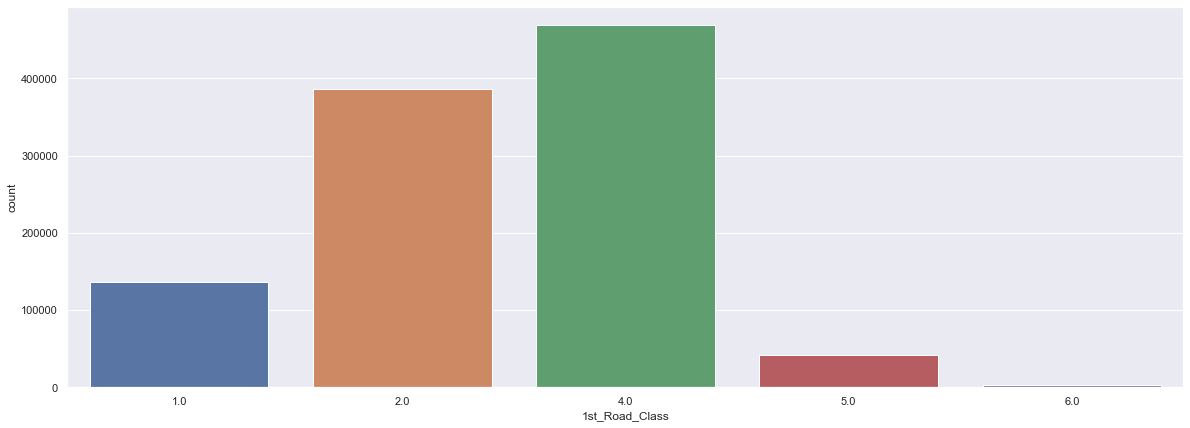

In [95]:
plt.figure(figsize=(20,7))
sns.countplot(x='1st_Road_Class'  , data=df);

**1st_Road_Class**  
B = 1  , 
C = 2   , 
A = 4  ,  
Motorway = 5 ,      

 A(M) = 6
    
Here most of the accidents took place on Ist_Road_Class 4.0 That is labelled as A type . More tahn 45000 accidents took place 
on claas A , then Class type C that is represented by 2 , then Class B and least on Motorway Road class. And the road A(M) 
shown by number 6 did not have any accident.  These are the findings according to the data provided.

In [19]:
df['1st_Road_Class'].value_counts()

4.0    469170
2.0    386737
1.0    136931
5.0     42006
6.0      2664
Name: 1st_Road_Class, dtype: int64

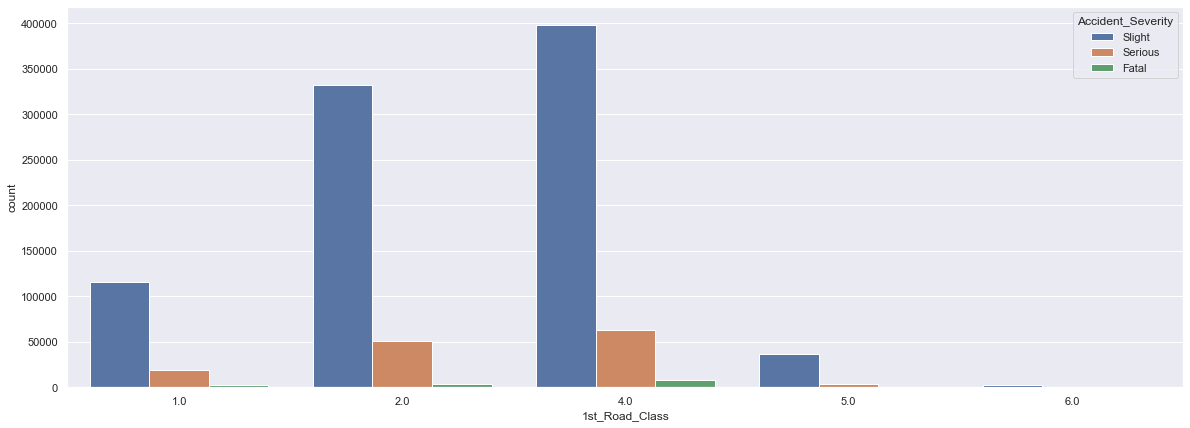

In [96]:
plt.figure(figsize=(20,7))
sns.countplot(x='1st_Road_Class'  , hue='Accident_Severity' , data=df);

In [21]:
df.groupby('Accident_Severity')['1st_Road_Class'].mean()

Accident_Severity
Fatal      3.148153
Serious    2.873535
Slight     2.904932
Name: 1st_Road_Class, dtype: float64

In [22]:
df.groupby('Accident_Severity')['2nd_Road_Class'].mean()

Accident_Severity
Fatal      1.229645
Serious    1.346877
Slight     1.485468
Name: 2nd_Road_Class, dtype: float64

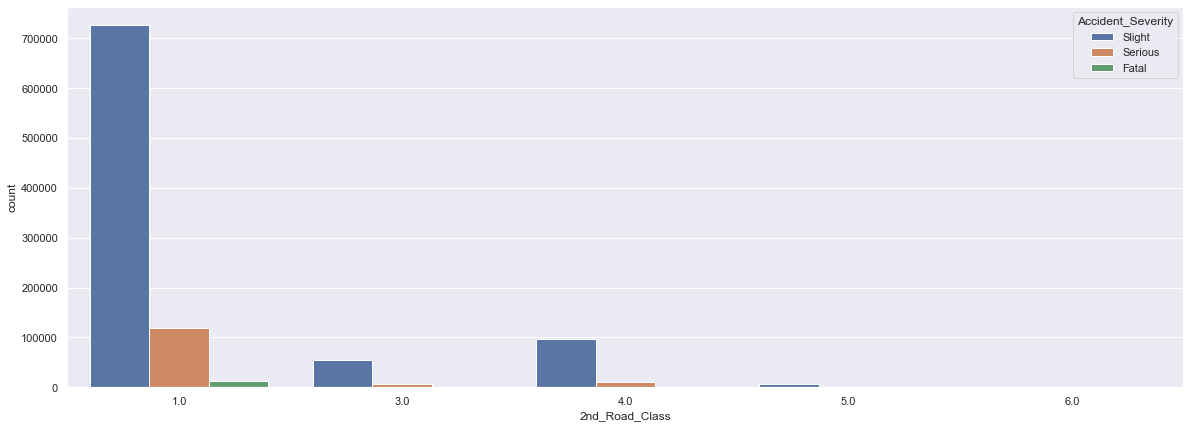

In [97]:
plt.figure(figsize=(15,6))
sns.countplot(x='2nd_Road_Class'  , hue='Accident_Severity' , data=df);

In [27]:
df['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts()

1.0    836563
2.0    198671
3.0      2274
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

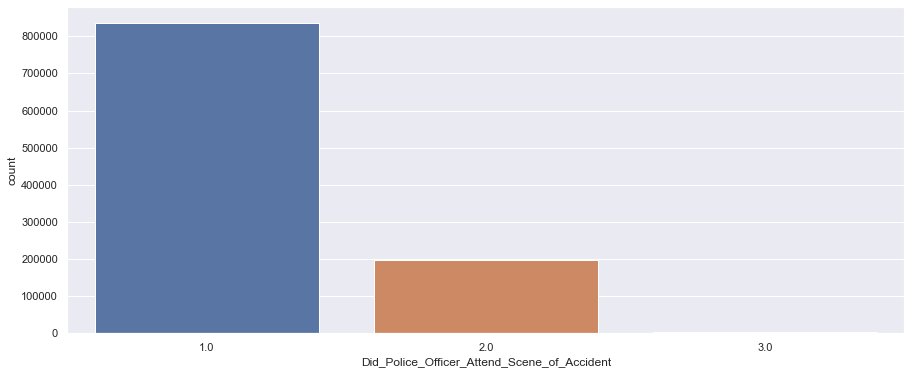

In [105]:
plt.figure(figsize=(15,6))
sns.countplot(x='Did_Police_Officer_Attend_Scene_of_Accident' , data=df);

### Year

In [25]:
df['Year'].value_counts()

2005    194566
2006    187623
2007    180292
2008    168924
2009    162463
2010    143640
Name: Year, dtype: int64

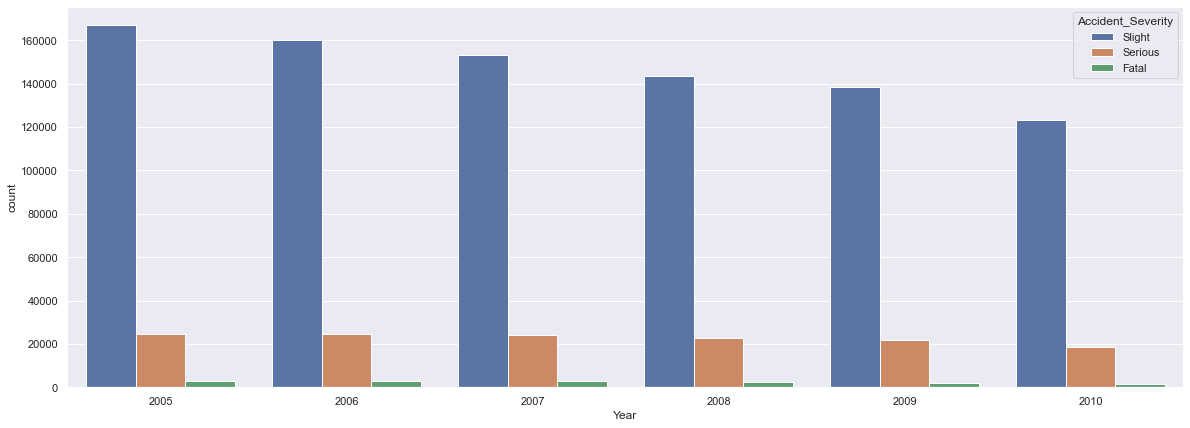

In [100]:
plt.figure(figsize=(20,7))
sns.countplot(x='Year' , hue='Accident_Severity' ,  data=df);


In [31]:
df['Special_Conditions_at_Site_missing'].value_counts()

1    1010805
0      26703
Name: Special_Conditions_at_Site_missing, dtype: int64

In [32]:
df.groupby('Special_Conditions_at_Site_missing').mean()

,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,...,Weather_Conditions,Year,InScotland,1st_Road_Class_missing,2nd_Road_Class_missing,2nd_Road_Number_missing,Carriageway_Hazards_missing,Junction_Control_missing,LSOA_of_Accident_Location_missing,Weather_Conditions_missing
Special_Conditions_at_Site_missing,,,,,,,,,,,,,,,,,,,,,
0,3.043441,992.457552,1.449200,326.477415,2.636970,3.973973,1.146912,4.707636,2.971763,52.670252,...,1.512339,2007.332135,1.068794,0.23473,0.821443,0.006516,0.930420,0.432685,0.081152,0.012620
1,2.900490,1014.151276,1.463991,393.077001,3.372008,4.010737,1.197166,4.255034,3.133348,52.570318,...,1.361501,2007.335521,1.059322,0.29152,0.811312,0.010371,0.982585,0.334682,0.067862,0.018563


In [33]:
df['Carriageway_Hazards'].value_counts()

3.0    667432
4.0    297362
5.0     42226
2.0     26736
6.0      3752
Name: Carriageway_Hazards, dtype: int64

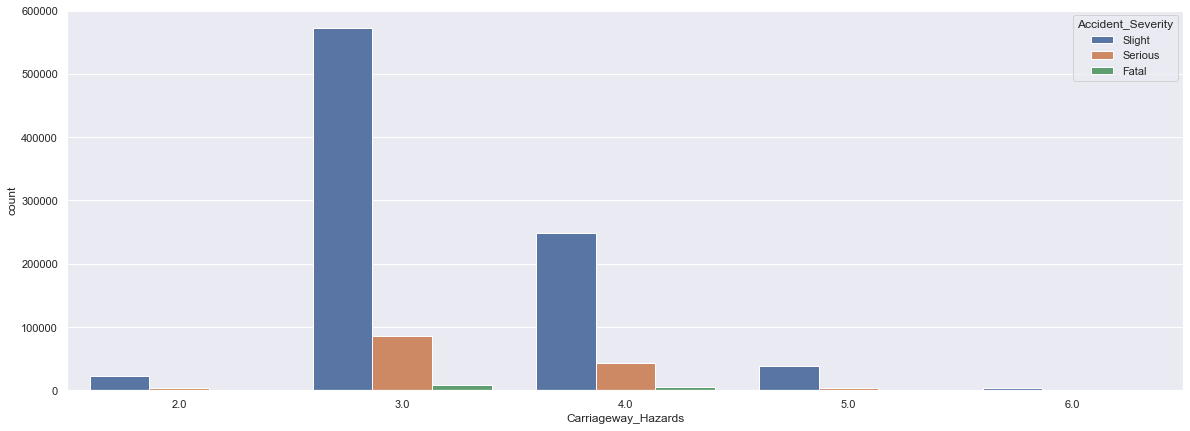

In [101]:
plt.figure(figsize=(20,7))
sns.countplot(x='Carriageway_Hazards' ,hue='Accident_Severity' , data=df);

### Time Feature

In [35]:
#df['Time'].unique()  check time data from accident and compare it with this data
df['Time']

0          2
1          3
2          2
3          2
4          2
          ..
1037503    4
1037504    3
1037505    1
1037506    2
1037507    1
Name: Time, Length: 1037508, dtype: int64

In [36]:
from datetime import datetime
#df['Time']= df['Time'].astype('float')
df["Time"] = pd.to_datetime(df["Time"], format ="%H")
df["Time"].dtype

dtype('<M8[ns]')

In [37]:
df['Hour']=df['Time'].apply(lambda x:x.hour)
df.drop('Time', axis=1, inplace=True)
df.shape


(1037508, 41)

In [38]:
df['Hour']


0          2
1          3
2          2
3          2
4          2
          ..
1037503    4
1037504    3
1037505    1
1037506    2
1037507    1
Name: Hour, Length: 1037508, dtype: int64

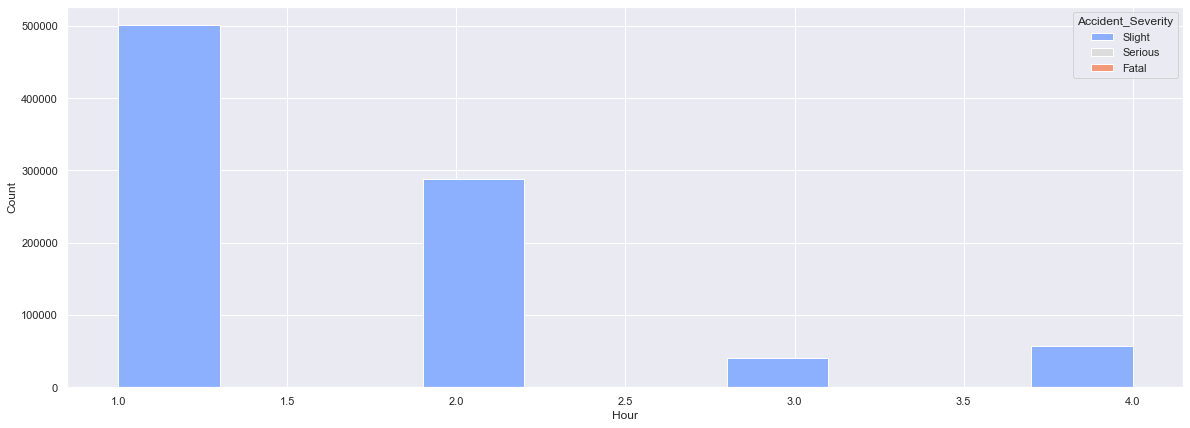

In [39]:
plt.figure(figsize=(20, 7))
sns.histplot(df, x="Hour", hue="Accident_Severity", palette="coolwarm", alpha=1.0, bins=10);

### Number of Casualities 

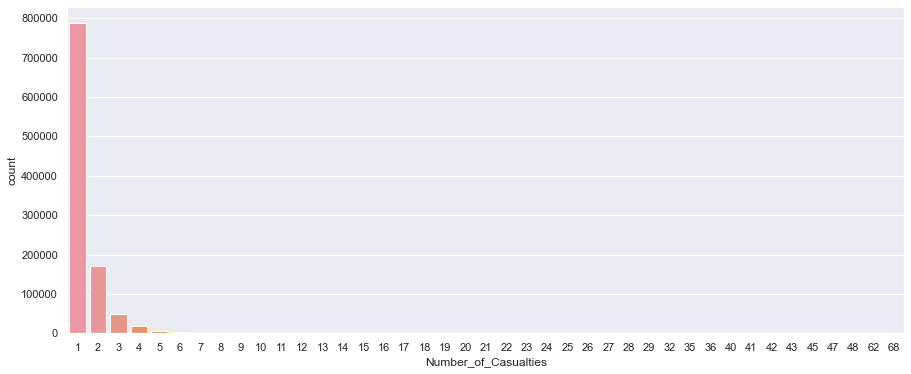

In [40]:
plt.figure(figsize=(15,6))

sns.countplot(x='Number_of_Casualties' , data=df);

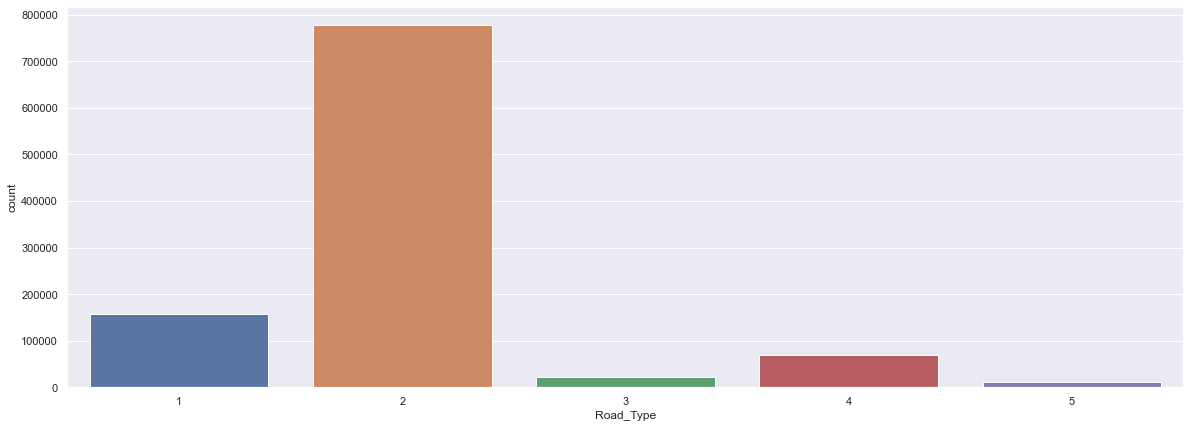

In [102]:
plt.figure(figsize=(20,7))

sns.countplot(x='Road_Type' ,  data=df);

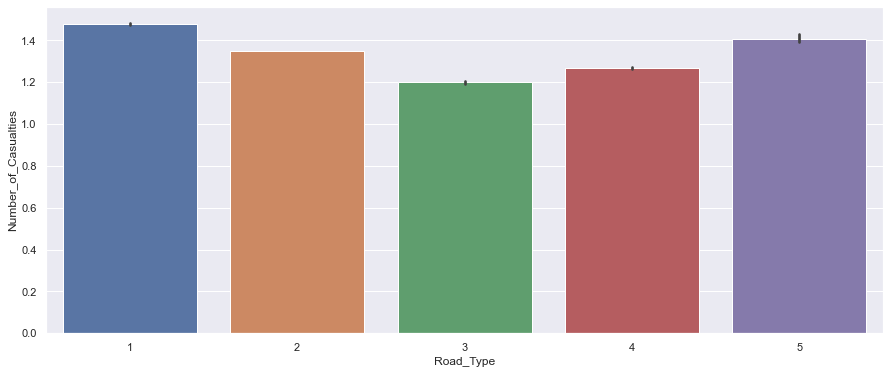

In [104]:
plt.figure(figsize=(15,6))

sns.barplot(x='Road_Type'  , y='Number_of_Casualties' , data=df );

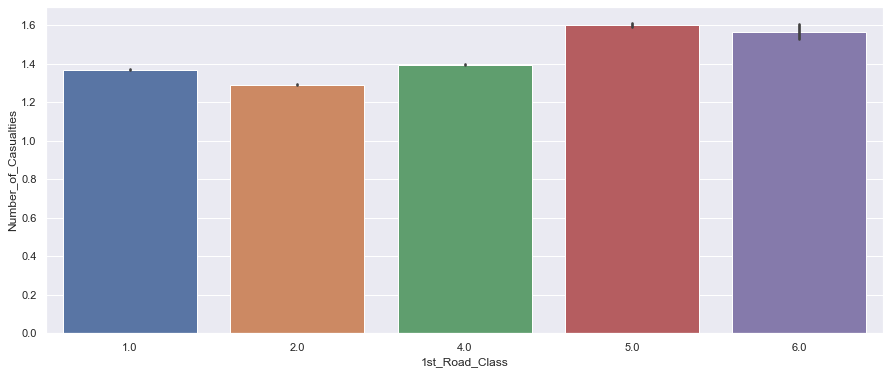

In [26]:
plt.figure(figsize=(15,6))

sns.barplot(x='1st_Road_Class'  , y='Number_of_Casualties' , data=df );

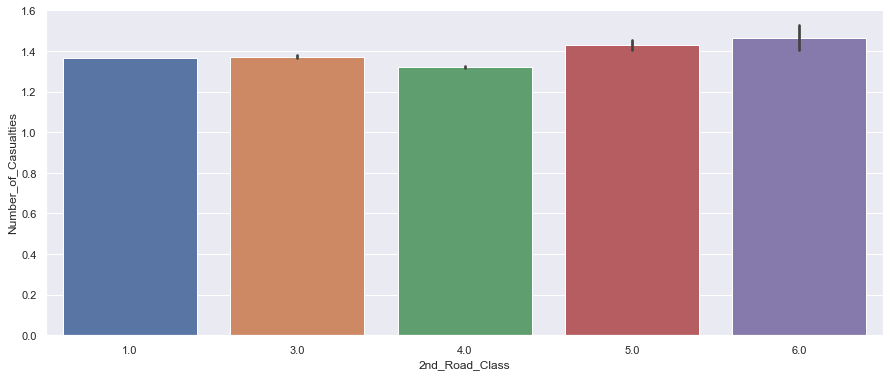

In [44]:
plt.figure(figsize=(15,6))

sns.barplot(x='2nd_Road_Class'  , y='Number_of_Casualties' , data=df );

In [45]:
df.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].value_counts(normalize=True).reset_index(name='Percent')

,Urban_or_Rural_Area,Number_of_Casualties,Percent
0,1,1,0.800238
1,1,2,0.142994
2,1,3,0.036928
3,1,4,0.012627
4,1,5,0.004503
...,...,...,...
61,2,45,0.000003
62,2,47,0.000003
63,2,48,0.000003
64,2,62,0.000003


### Discovering Features of Rural Urban Areas and some Features related to Road

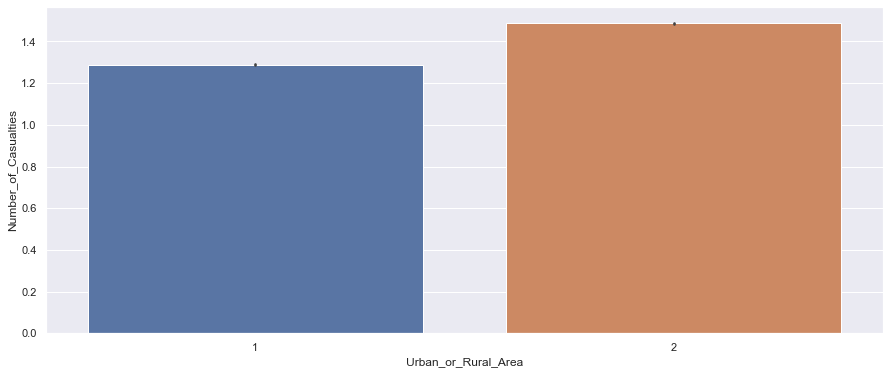

In [108]:
plt.figure(figsize=(15,6))
sns.barplot(x='Urban_or_Rural_Area'  , y='Number_of_Casualties' , data=df );
# urban area 1 and rural area 2 

In [47]:
df['Urban_or_Rural_Area'].value_counts()

1    659720
2    377788
Name: Urban_or_Rural_Area, dtype: int64

In [48]:
df['Speed_limit'].value_counts()

30    659059
60    175892
40     85744
70     79008
50     30756
20      7024
15        15
10        10
Name: Speed_limit, dtype: int64

In [49]:
df.groupby('Urban_or_Rural_Area')['Speed_limit'].value_counts()

Urban_or_Rural_Area  Speed_limit
1                    30             573758
                     40              49643
                     50              10446
                     60               9894
                     70               9894
                     20               6064
                     15                 15
                     10                  6
2                    60             165998
                     30              85301
                     70              69114
                     40              36101
                     50              20310
                     20                960
                     10                  4
Name: Speed_limit, dtype: int64

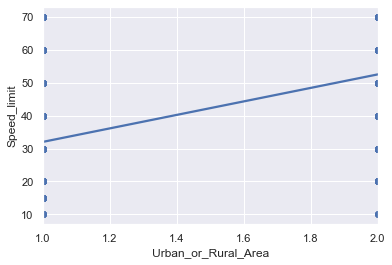

In [50]:
sns.regplot(x='Urban_or_Rural_Area' , y='Speed_limit' , data=df );

**Observation**
speed limit is lower in urban area as compared to Rural Area

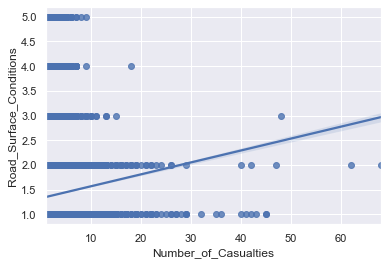

In [51]:
sns.regplot(x='Number_of_Casualties' , y='Road_Surface_Conditions' , data=df );

### Weather Condition 

In [52]:
df['Weather_Conditions'].unique()

array([1., 2., 3., 4., 5., 6., 7., 9.])

In [53]:
df['Weather_Conditions'].value_counts()

1.0    839461
2.0    127893
3.0     26295
6.0     14582
5.0     13459
4.0      8533
7.0      6010
9.0      1275
Name: Weather_Conditions, dtype: int64

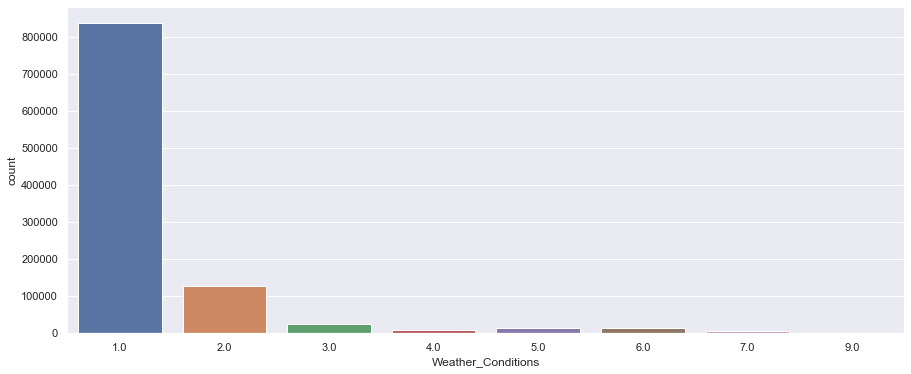

In [110]:
plt.figure(figsize=(15,6))
sns.countplot(x='Weather_Conditions' ,   data = df);

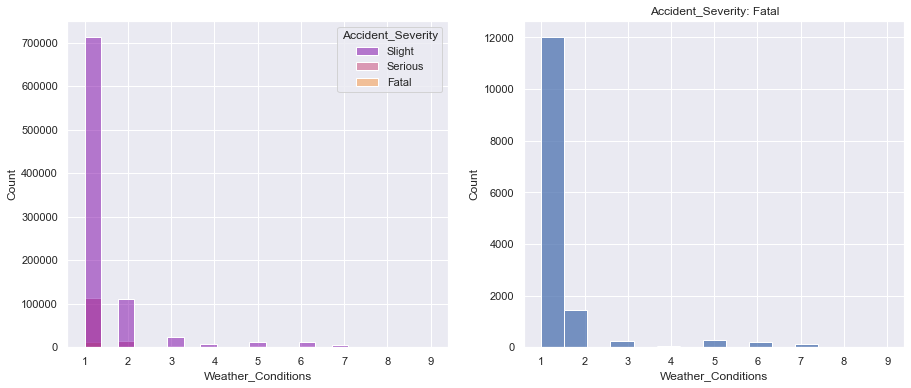

In [55]:
fig, ax= plt.subplots(nrows=1 , ncols=2 , figsize=(15,6))
sns.histplot(x='Weather_Conditions' ,hue='Accident_Severity'  ,palette="plasma" ,  data=df , ax=ax[0]);
sns.histplot(x='Weather_Conditions' ,palette="tab10" ,  data=df_fatal , ax=ax[1]).set(title=f"Accident_Severity: Fatal");

In [57]:
df_weather_casual= df.groupby('Weather_Conditions')['Number_of_Casualties'].value_counts(normalize=True).reset_index(name='Percent')

##### Here Below I am dropping Some Features and viewing other Important Features Relation  

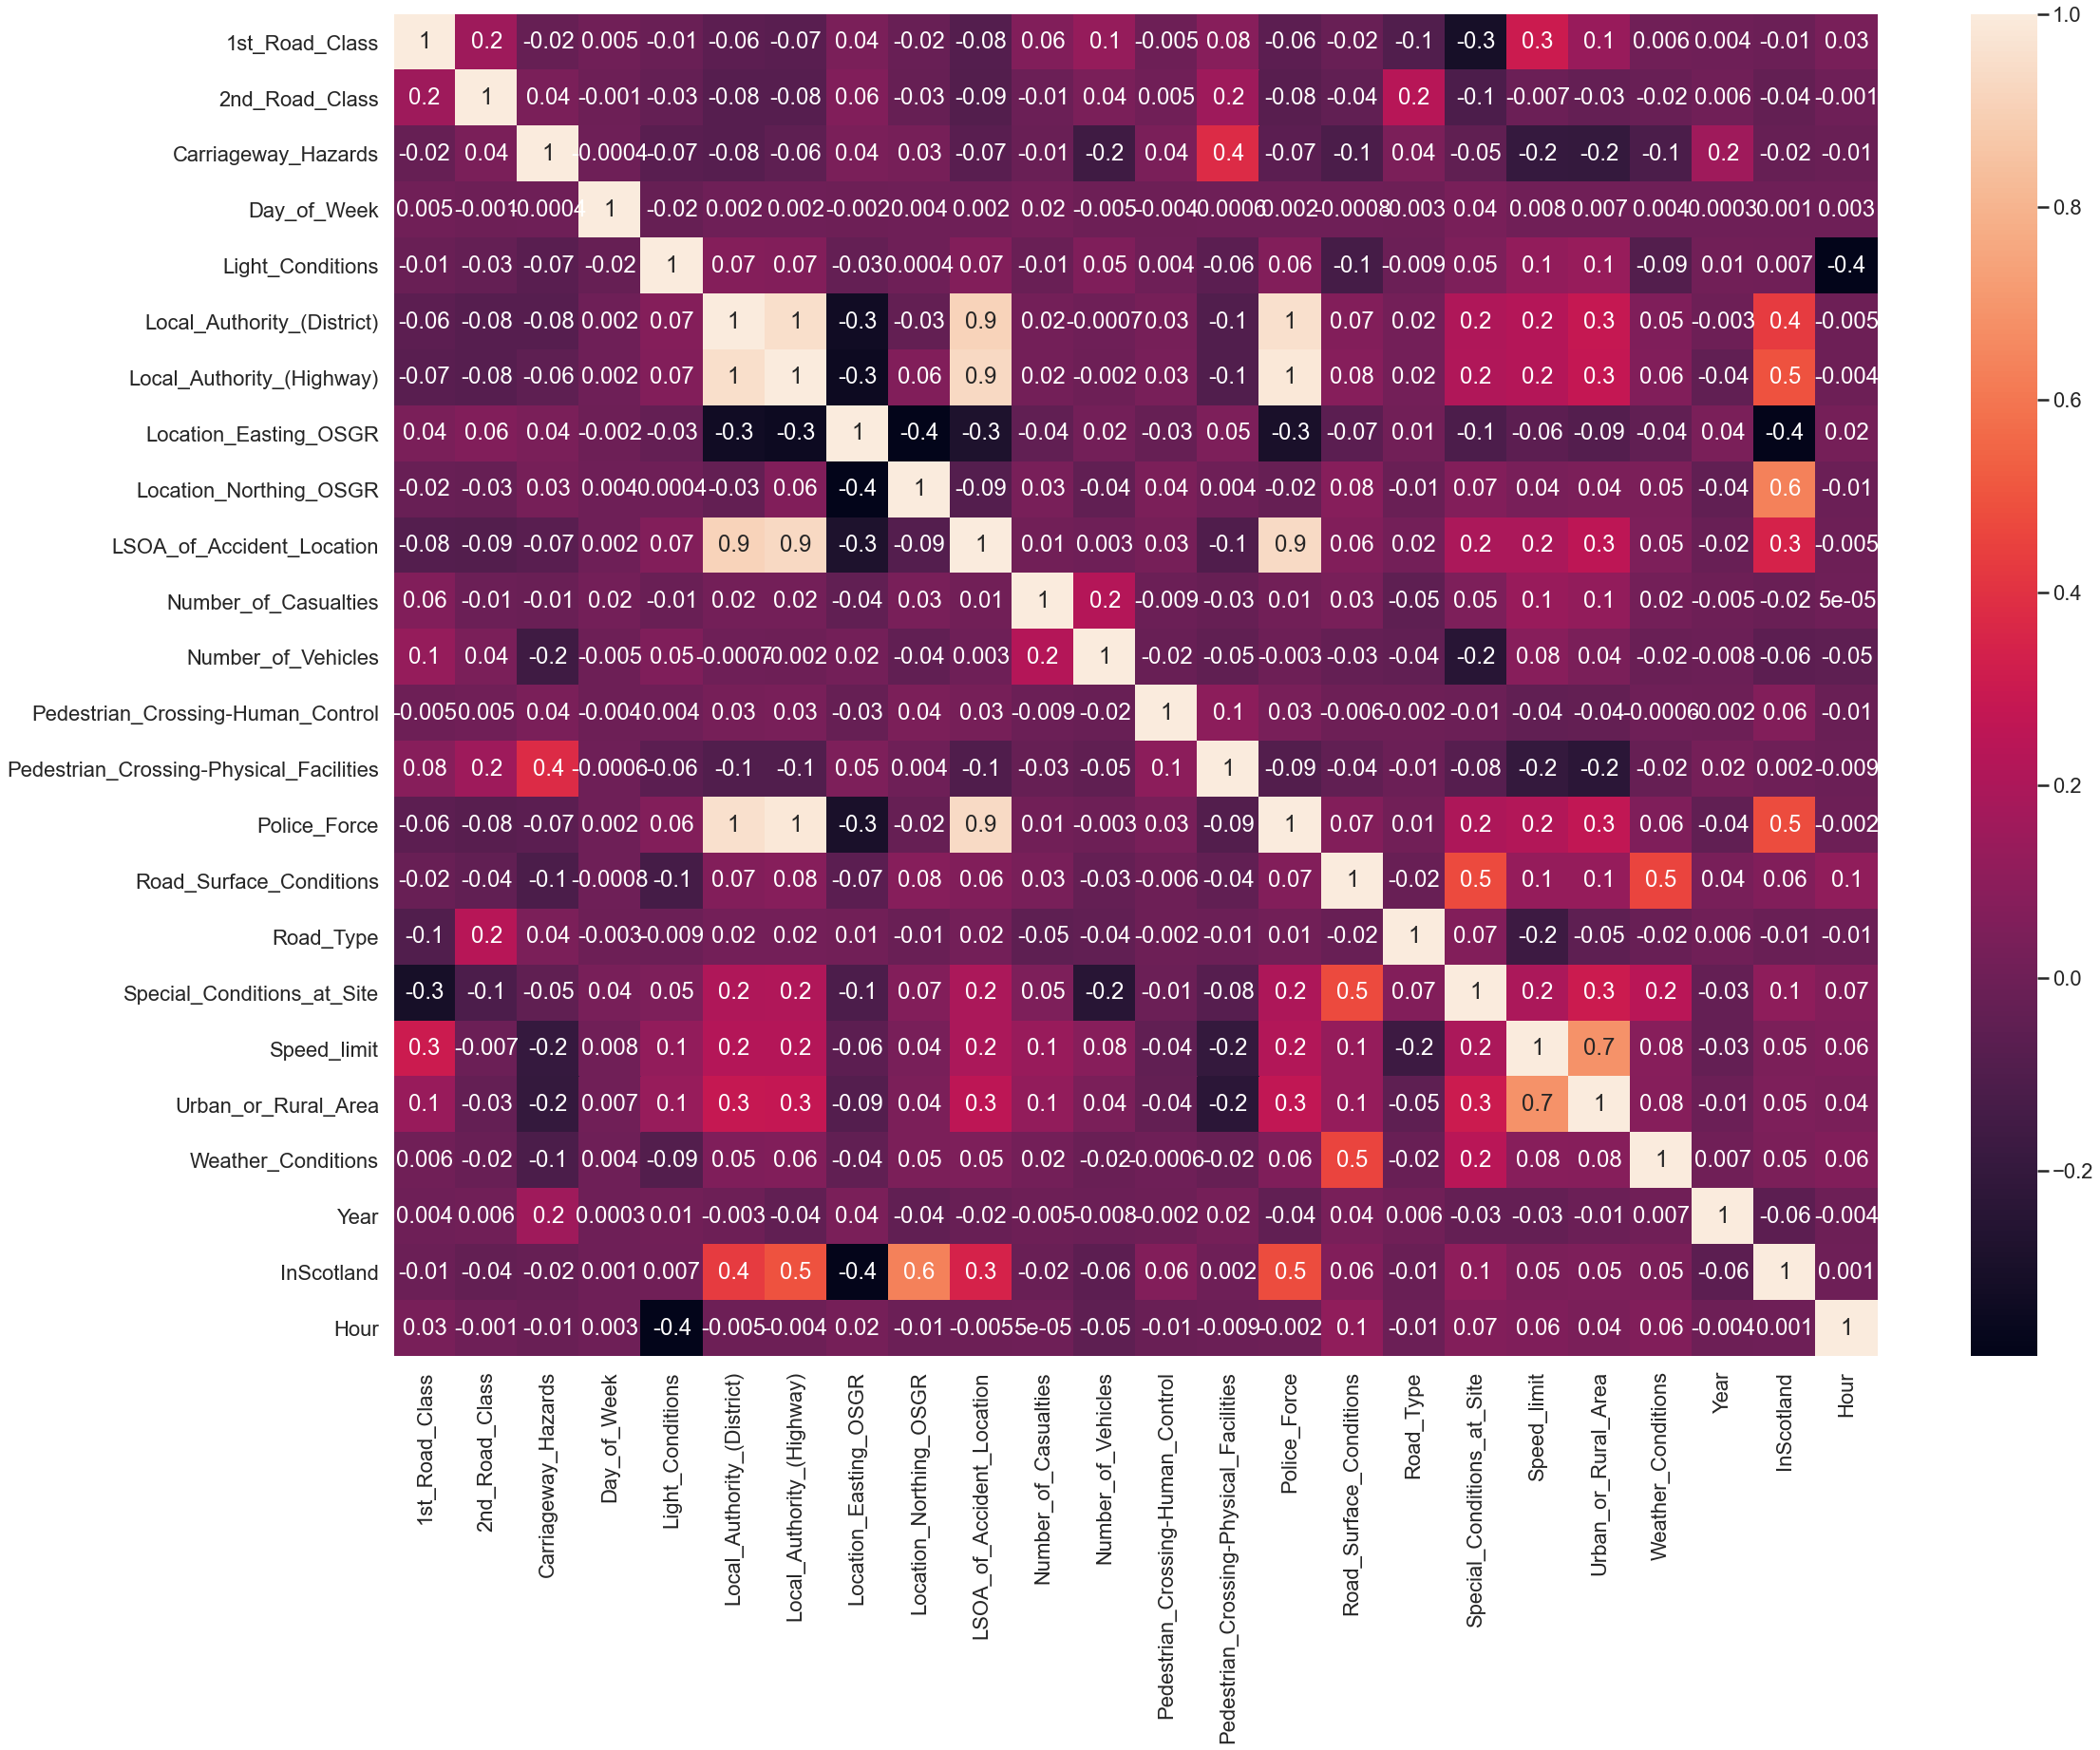

In [58]:
df1=df.drop([ '1st_Road_Number', '2nd_Road_Number','1st_Road_Class_missing','2nd_Road_Class_missing','2nd_Road_Number_missing',
       'Carriageway_Hazards_missing', 'Junction_Control_missing','Longitude',
       'LSOA_of_Accident_Location_missing','Special_Conditions_at_Site_missing', 'Weather_Conditions_missing', 
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Junction_Control',
       'Junction_Detail', 'Latitude' ],  axis=1)


sns.set_context('poster')
plt.figure(figsize=(35,26))
cor = df1.drop('Accident_Index',axis=1).corr()
sns.heatmap(cor, annot=True, fmt='.1g');

### 1st Road Class

In [43]:
df['1st_Road_Class'].unique()

array([1., 2., 4., 5., 6.])

In [62]:
df1=df[df['1st_Road_Class']==1]['1st_Road_Number'] 
df2=df[df['1st_Road_Class']==3]['1st_Road_Number'] 
df4=df[df['1st_Road_Class']==4]['1st_Road_Number']
df5=df[df['1st_Road_Class']==5]['1st_Road_Number']
df6=df[df['1st_Road_Class']==6]['1st_Road_Number']
df7=df[df['1st_Road_Class']==0]['1st_Road_Number']
#plt.tight_layout()
df7.head()

Series([], Name: 1st_Road_Number, dtype: float64)

In [65]:
def draw_histogram(data, ax, title):
    sns.histplot(x=data, bins=50, ax=ax).set(title=f"Road Class - {title}");

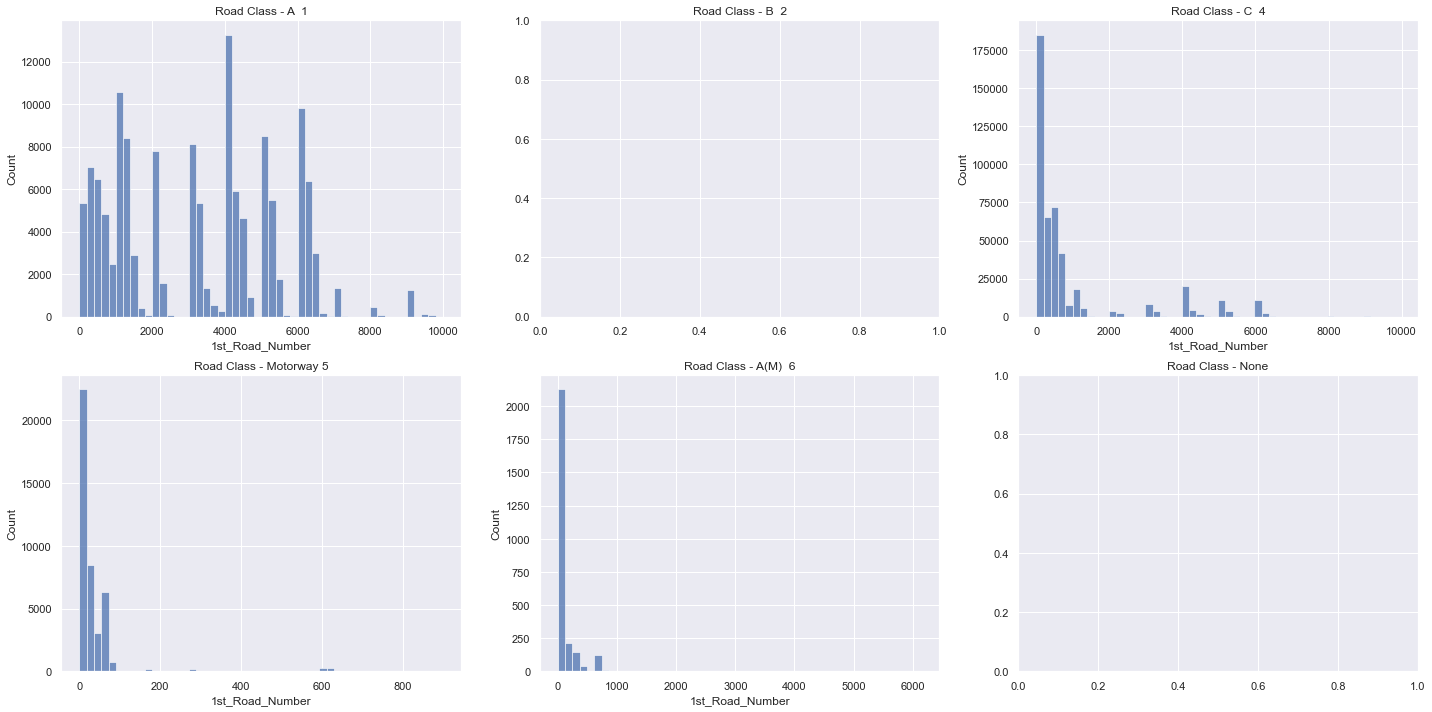

In [66]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
ax = ax.flatten()

draw_histogram(df1, ax[0], "A  1")
draw_histogram(df2, ax[1], "B  2")
draw_histogram(df4, ax[2], "C  4")
draw_histogram(df5, ax[3], "Motorway 5")
draw_histogram(df6, ax[4], "A(M)  6")
draw_histogram(df7, ax[5], "None")

plt.tight_layout()

### 2nd Road Class

In [73]:
df['2nd_Road_Class'].unique()

array([1., 3., 4., 5., 6.])

In [82]:
df_a=df[df['2nd_Road_Class']==1]['2nd_Road_Number'] 
df_b=df[df['2nd_Road_Class']==3]['2nd_Road_Number']
df_c=df[df['2nd_Road_Class']==4]['2nd_Road_Number']
df_m=df[df['2nd_Road_Class']==5]['2nd_Road_Number']
df_am=df[df['2nd_Road_Class']==6]['2nd_Road_Number'] 
df_b

4           304.0
5           325.0
28          415.0
87          412.0
107         450.0
            ...  
1037401    9174.0
1037402     817.0
1037431    9052.0
1037435    9055.0
1037501    9152.0
Name: 2nd_Road_Number, Length: 63391, dtype: float64

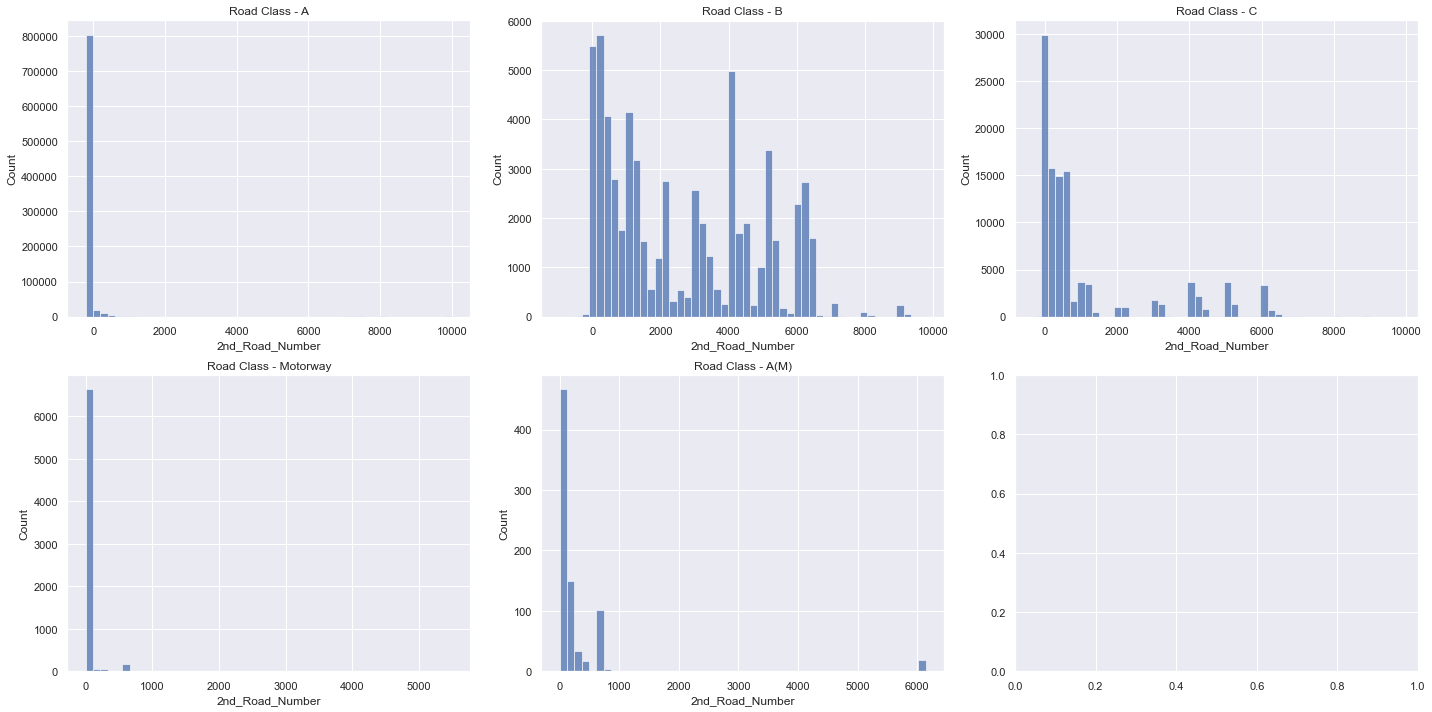

In [85]:
fig, ax=plt.subplots(nrows=2 , ncols=3 , figsize=(20,10))
ax = ax.flatten()

draw_histogram(df_a , ax[0]  , "A"  );
draw_histogram(df_b ,  ax[1]  , "B"  );
draw_histogram(df_c ,  ax[2]  , "C"  );
draw_histogram(df_m,  ax[3]  , "Motorway" );
draw_histogram(df_am , ax[4]  , "A(M)"  );
plt.tight_layout()
plt.show()

### Light_Conditions

In [86]:
df['Light_Conditions'].nunique() 

5

In [87]:
df['Light_Conditions'].unique() 

array([1, 2, 3, 4, 5], dtype=int64)

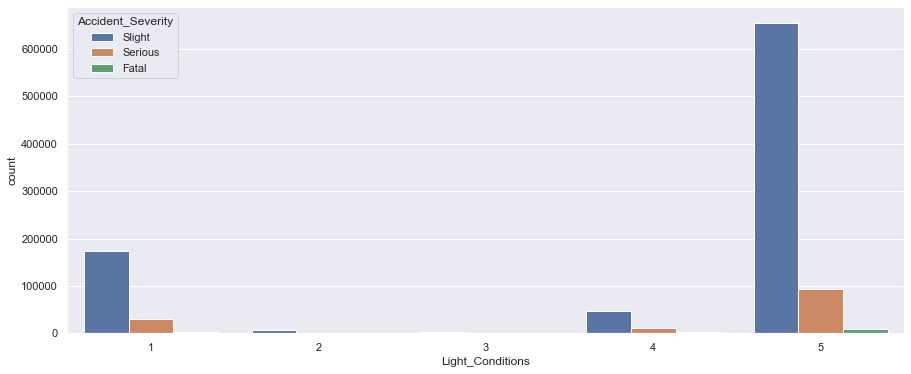

In [88]:
plt.figure(figsize=(15,6))
sns.countplot(x='Light_Conditions' , hue=  'Accident_Severity' , data=df);

**Observation**
The most of the accidents took place at condion 5 ie daylight and also the fatal accidents also took place in daylight.and then 
in darkness when lights were lit ie, at 1 .

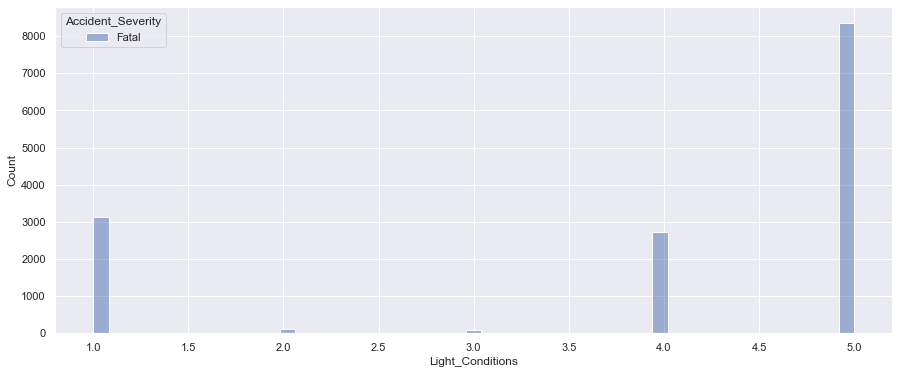

In [89]:
plt.figure(figsize=(15,6))
sns.histplot(x='Light_Conditions' , hue=  'Accident_Severity' , data=df_fatal);

**Observation**  If we see on fatal data , that also shows more deaths in daylight ie, number  5 and in darkness when lights were 
lit. ie, at number 1. 